In [1]:
from keras import models
from keras import layers
from keras.layers import Dense, Conv2D, Flatten,MaxPooling2D,Dropout,ZeroPadding2D
import pandas as pd
import numpy as np


Using TensorFlow backend.


## Read Data 

Ths option is  for Google Colab - Reading from Google Drive 

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


with open('/content/gdrive/My Drive/foo.txt', 'w') as f:
  f.write('Hello Google Drive!')
!cat /content/gdrive/My\ Drive/foo.txt

Read the train and test data from the drive 

In [0]:
Train = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/train.csv')
Test = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/test.csv')

This option is to read localy the files 

In [6]:
Train = pd.read_csv("train_digits.csv")
Test = pd.read_csv("test_digits.csv")

FileNotFoundError: ignored

In [7]:
Train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Read the labels into a seprate array
y_train = Train['label'].values

#convert the images into a matrix of size 42,000 X 28 X 28 
train_images = Train.loc[:,Train.columns != 'label'].values
train_images = train_images.reshape(42000,28,28,1)
train_images.shape


(42000, 28, 28, 1)

## Reshape
Convert to the Keras expected sahpe

In [9]:

#convert the images into a matrix of size 28,000 X 28 X 28 
test_images = Test.values
test_images_final = test_images.reshape(28000,28,28,1)
test_images_final.shape


(28000, 28, 28, 1)

## Displaying an Example of a digit

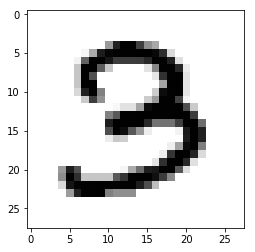

In [10]:
import matplotlib.pyplot as plt
digit = (train_images[14].reshape(28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

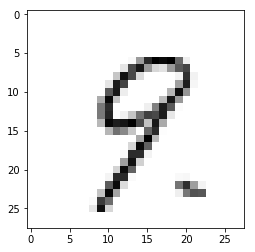

In [11]:
import matplotlib.pyplot as plt
digit = (test_images[2].reshape(28,28))
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## Preparing the image data

In [0]:
#reshape data to fit model
#X_train = X_train.reshape(42000,28,28,1)
train_images = train_images.astype('float32') / 255
#test_images_final = X_test.reshape(28000,28,28,1)
test_images_final = test_images_final.astype('float32') / 255

## The network architecture

In [0]:
#network = models.Sequential()
#network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
#network.add(layers.Dense(512, activation='relu'))
#network.add(layers.Dense(10, activation='softmax'))


#create model
network = models.Sequential()
#convolutional layer with rectified linear unit activation
#network.add(ZeroPadding2D(padding=(1, 1), data_format=None))
network.add(Conv2D(64, kernel_size=(8, 8),
                 activation='relu',
                 input_shape=(28,28,1)))
#32 convolution filters used each of size 8X8
#again
#network.add(ZeroPadding2D(padding=(1, 1), data_format=None))
network.add(Conv2D(32, (5, 5), activation='relu'))
#64 convolution filters used each of size 5x5
#choose the best features via pooling
network.add(MaxPooling2D(pool_size=(5, 5)))
#randomly turn neurons on and off to improve convergence
network.add(Dropout(0.25))
#flatten since too many dimensions, we only want a classification output
network.add(Flatten())
#fully connected to get all relevant data
network.add(Dense(128, activation='relu'))
#one more dropout for convergence' sake :) 
network.add(Dropout(0.5))
#output a softmax to squash the matrix into output probabilities
network.add(Dense(10, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


## The compilation step

In [0]:
from keras import optimizers
network.compile(optimizer='Adam',
loss='categorical_crossentropy',
metrics=['accuracy'])

network.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss='categorical_crossentropy',
metrics=['accuracy'])

## Spliting the Train data 

In [0]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_images, y_train, test_size=0.15)

## Preparing the labels

In [0]:
from keras.utils import to_categorical
train_labels = to_categorical(y_train)
test_labels = to_categorical(y_test)


## Fit the Network

In [0]:
history = network.fit(X_train, train_labels, epochs=25, batch_size=1024,validation_data=(X_test,test_labels))

Instructions for updating:
Use tf.cast instead.
Train on 35700 samples, validate on 6300 samples
Epoch 1/25
35700/35700 [==============================] - 5s 129us/step - loss: 1.1582 - acc: 0.6204 - val_loss: 0.3584 - val_acc: 0.8910
Epoch 2/25
35700/35700 [==============================] - 1s 34us/step - loss: 0.4068 - acc: 0.8751 - val_loss: 0.1680 - val_acc: 0.9540
Epoch 3/25
35700/35700 [==============================] - 1s 34us/step - loss: 0.2718 - acc: 0.9175 - val_loss: 0.1233 - val_acc: 0.9644
Epoch 4/25
35700/35700 [==============================] - 1s 34us/step - loss: 0.2030 - acc: 0.9375 - val_loss: 0.0962 - val_acc: 0.9706
Epoch 5/25
35700/35700 [==============================] - 1s 34us/step - loss: 0.1702 - acc: 0.9497 - val_loss: 0.0885 - val_acc: 0.9724
Epoch 6/25
35700/35700 [==============================] - 1s 34us/step - loss: 0.1426 - acc: 0.9579 - val_loss: 0.0802 - val_acc: 0.9746
Epoch 7/25
35700/35700 [==============================] - 1s 35us/step - loss: 0

## Model Performances 

In [0]:
test_loss, test_acc = network.evaluate(X_test, test_labels)
print('test_acc:', test_acc)

6300/6300 [==============================] - 0s 58us/step
test_acc: 0.99


In [0]:
#Make Prediction
predict = network.predict(test_images_final)
#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in predict]

## Plotting the training and validation loss

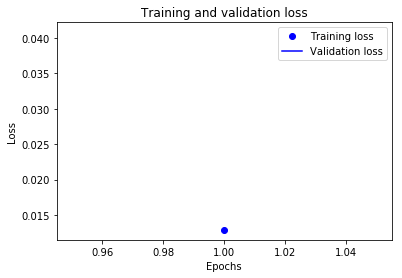

In [0]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range (1,len(history_dict['loss'])+1)
#epochs = range(1, 36)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
x = list(range(1, 28001))
df = pd.DataFrame({'ImageId' :x,'Label':y_classes})
df.to_csv("digitcnn9.csv",index=False)


In [0]:
from google.colab import files
files.download('digitcnn9.csv') 

## Example of Real Image